new_age max: 114140
new_age min: 16740
new_age length: 975


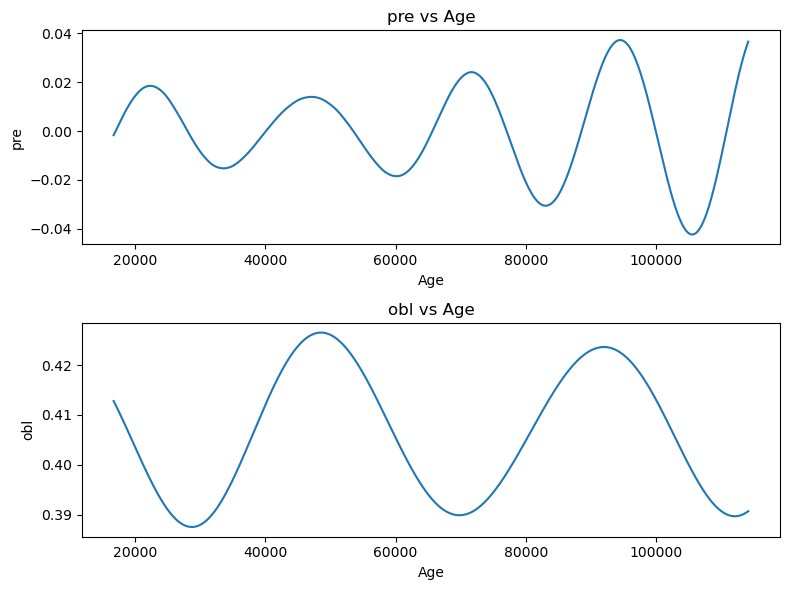

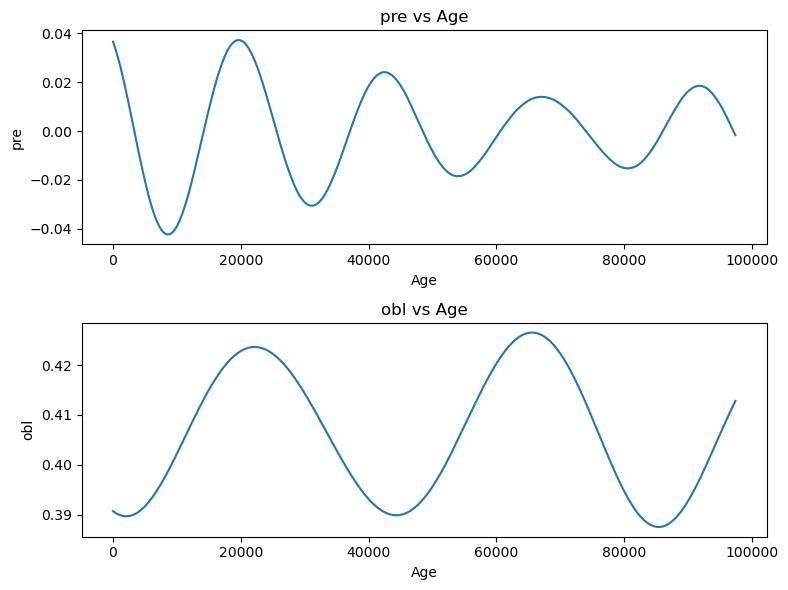

97400
0
975


In [47]:
# process the long precession data
import pandas as pd
import numpy as np

# Read the file into a DataFrame
df_pre = pd.read_csv(
    r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_long.txt", 
    sep='\s+',       # '\s+' means "split on any whitespace"
    header=None,     # or specify a row number if there's a header
    engine='python'
)


df_pre.iloc[:, 0] = df_pre.iloc[:, 0].abs() * 1000

# Rename the columns
df_pre.columns = ['age', 'pre']

# flip the data upside down
df_pre = df_pre.iloc[::-1]
df_pre = df_pre.reset_index(drop=True)
df_pre


df_obl = pd.read_csv(r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl_long.txt", 
                     sep='\s+', 
                     header=None, 
                     engine='python')

df_obl.iloc[:, 0] = df_obl.iloc[:, 0].abs() * 1000

# df_obl = df_obl.iloc[::-1]
df_obl.columns = ['age', 'obl']
df_obl = df_obl.iloc[::-1]
df_obl = df_obl.reset_index(drop=True)
df_obl

age_start = 16740
step=100
age_end = 114140


# Create a new time from age_start to age_end step=100
new_age = np.arange(age_start, age_end+1, 100)

# 1) Interpolate pre to new_age
pre_interp = np.interp(new_age, df_pre['age'], df_pre['pre'])
df_pre_interp = pd.DataFrame({'age': new_age, 'pre': pre_interp})

# 2) Interpolate obl to new_age
obl_interp = np.interp(new_age, df_obl['age'], df_obl['obl'])
df_obl_interp = pd.DataFrame({'age': new_age, 'obl': obl_interp})

# prin the max and min of the new_age
print('new_age max:', new_age.max())
print('new_age min:', new_age.min())
# print the length of new_age
print('new_age length:', len(new_age))




import pandas as pd
import matplotlib.pyplot as plt


# -- Plotting in a 2x1 figure --
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Upper subplot: pre
ax1.plot(df_pre_interp['age'], df_pre_interp['pre'])
ax1.set_title('pre vs Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('pre')

# Lower subplot: obl
ax2.plot(df_obl_interp['age'], df_obl_interp['obl'])
ax2.set_title('obl vs Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('obl')

plt.tight_layout()
plt.show()




df_pre_interp['age'] = df_pre_interp['age']*-1  +age_end
df_obl_interp['age'] = df_obl_interp['age'] *-1 + age_end

import pandas as pd
import matplotlib.pyplot as plt


# -- Plotting in a 2x1 figure --
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Upper subplot: pre
ax1.plot(df_pre_interp['age'], df_pre_interp['pre'])
ax1.set_title('pre vs Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('pre')

# Lower subplot: obl
ax2.plot(df_obl_interp['age'], df_obl_interp['obl'])
ax2.set_title('obl vs Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('obl')

plt.tight_layout()
plt.show()



df_obl_interp
df_pre_interp

# print the max and min of df_pre['age']

print(df_pre_interp['age'].max())
print(df_pre_interp['age'].min())
# print the length of df_pre['age']
print(len(df_pre_interp['age']))


In [48]:
# save the data to csv
df_obl_interp.to_csv(r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl_long.csv", index=False)
df_pre_interp.to_csv(r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_long.csv", index=False)

In [9]:
# read csv data
import pandas as pd
df_obl = pd.read_csv(r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl_long.csv")
df_pre = pd.read_csv(r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_long.csv")


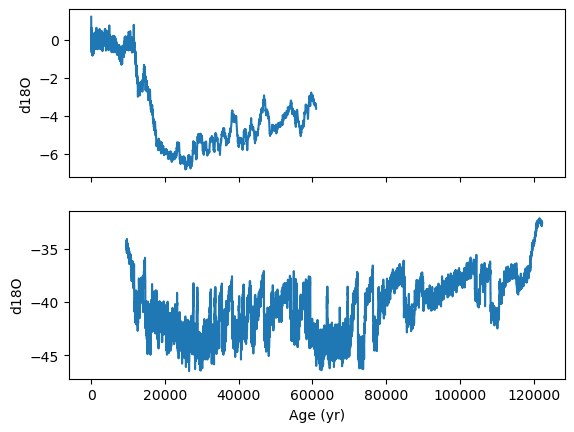

Antarctic Fivecore:
Start age:  0
End age:  61000
NGRIP:
Start age:  9540
End age:  122280


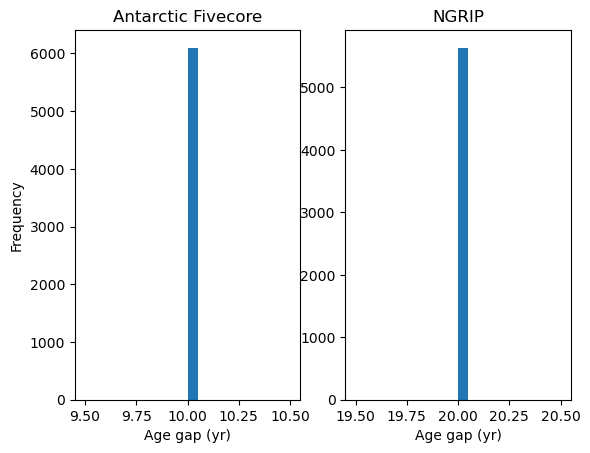

In [1]:
import pandas as pd


path = "D:/VScode/bipolar_seesaw_CCM/ice_core_data/Ant_Gre.xlsx"

# Loading the sheets Antarctic_Fivecore and NGRIP
df_ant = pd.read_excel(path, sheet_name="Antarctic_Fivecore")
df_ngrip = pd.read_excel(path, sheet_name="NGRIP")


import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(df_ant["age"], df_ant["d18O"], label="Antarctic Fivecore")
axs[1].plot(df_ngrip["age"], df_ngrip["d18O"], label="NGRIP")
axs[0].set_ylabel("d18O")
axs[1].set_xlabel("Age (yr)")
axs[1].set_ylabel("d18O")
plt.show()

# print the start and end age of both data
print("Antarctic Fivecore:")
print("Start age: ", df_ant["age"].min())
print("End age: ", df_ant["age"].max())
print("NGRIP:")
print("Start age: ", df_ngrip["age"].min())
print("End age: ", df_ngrip["age"].max())

# from age small to large, for the same age value in ngrip, remove the dupilcate
df_ngrip = df_ngrip.drop_duplicates("age", keep="first")


# plot 1 by 2 histograms to show the distribution of age gaps in both data
fig, axs = plt.subplots(1, 2)
axs[0].hist(df_ant["age"].diff().dropna(), bins=20)
axs[0].set_title("Antarctic Fivecore")
axs[0].set_xlabel("Age gap (yr)")
axs[0].set_ylabel("Frequency")
axs[1].hist(df_ngrip["age"].diff().dropna(), bins=20)
axs[1].set_title("NGRIP")
axs[1].set_xlabel("Age gap (yr)")
plt.show()

In [5]:
# read the pre.txt under D:\VScode\bipolar_seesaw_CCM\inso_data using pandas

import pandas as pd

# Read the file into a DataFrame
df_pre = pd.read_csv(
    r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre.txt", 
    sep='\s+',       # '\s+' means "split on any whitespace"
    header=None,     # or specify a row number if there's a header
    engine='python'
)


df_pre.iloc[:, 0] = df_pre.iloc[:, 0].abs() * 1000

# Reverse the DataFrame rows
df_pre = df_pre.iloc[::-1]

# Rename the columns
df_pre.columns = ['age', 'pre']




df_obl = pd.read_csv(r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl.txt", 
                     sep='\s+', 
                     header=None, 
                     engine='python')

df_obl.iloc[:, 0] = df_obl.iloc[:, 0].abs() * 1000

df_obl = df_obl.iloc[::-1]
df_obl.columns = ['age', 'obl']


# # crop the data for age>=100 <=23900
# df_pre = df_pre[(df_pre['age'] >= 100) & (df_pre['age'] <= 23900)]
# df_obl = df_obl[(df_obl['age'] >= 100) & (df_obl['age'] <= 23900)]

# # remove rows that can be divided by 200
# df_pre = df_pre[df_pre['age'] % 200 != 0]
# df_obl = df_obl[df_obl['age'] % 200 != 0]


df_obl
df_pre




,age,pre
1000,0.0,0.016280
999,100.0,0.016431
998,200.0,0.016568
997,300.0,0.016690
996,400.0,0.016798
...,...,...
4,99600.0,0.003828
3,99700.0,0.002715
2,99800.0,0.001597
1,99900.0,0.000475


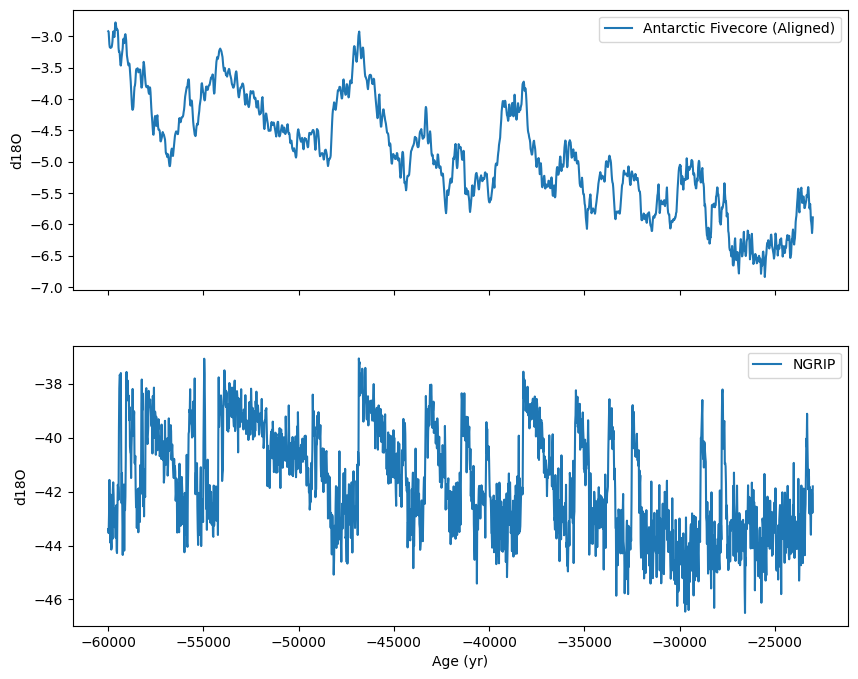

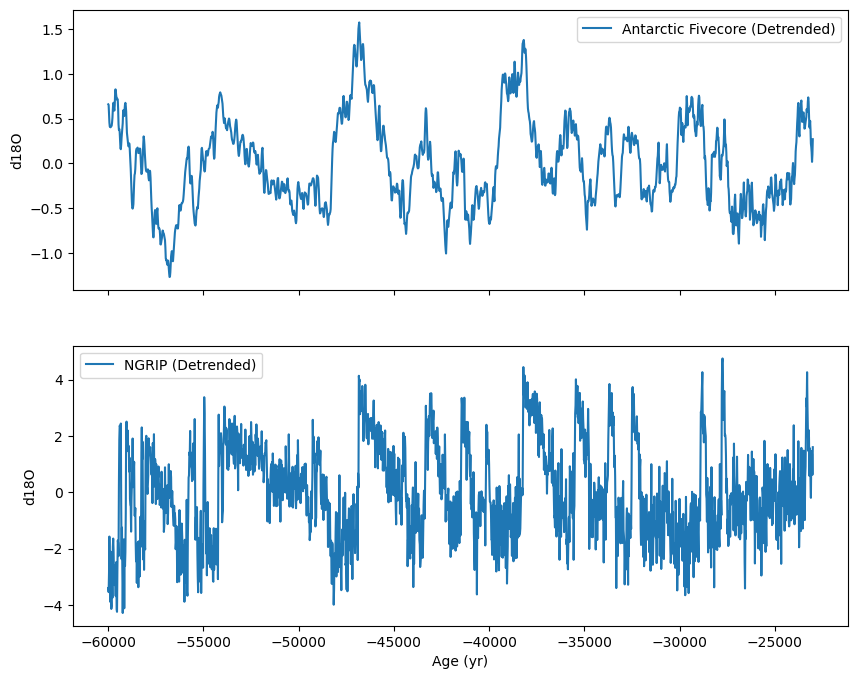

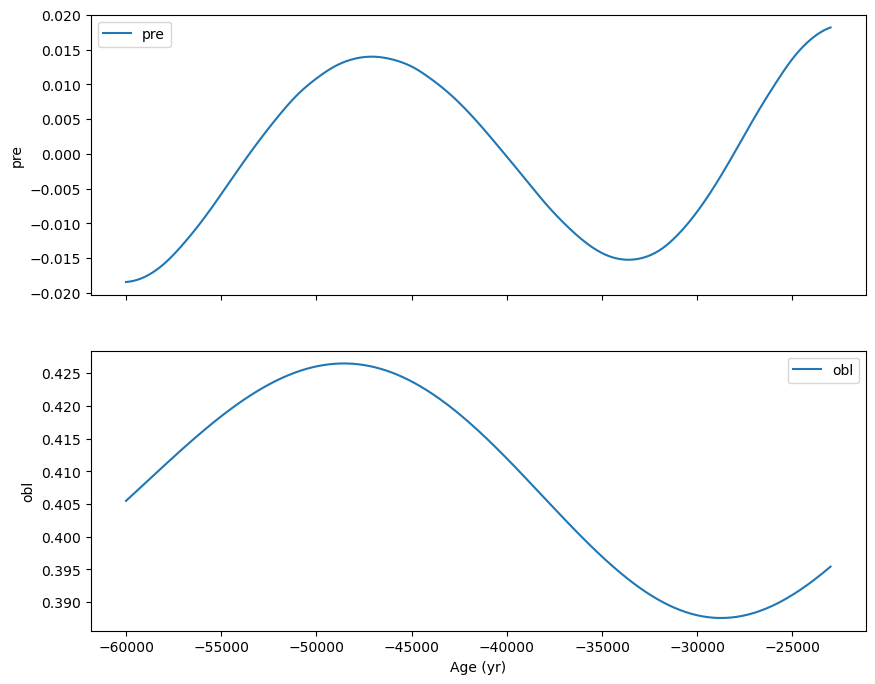

Length of the new time axis:  1851


In [6]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


# Convert dataframes to ndarrays
age_ant = df_ant["age"].values - 50
d18O_ant = df_ant["d18O"].values
age_ngrip = df_ngrip["age"].values
d18O_ngrip = df_ngrip["d18O"].values

# Interpolate both datasets
new_time_axis = np.arange(23000, 60001, 20)
interp_ant = interp1d(age_ant, d18O_ant, bounds_error=False, fill_value="extrapolate")
interp_ngrip = interp1d(age_ngrip, d18O_ngrip, bounds_error=False, fill_value="extrapolate")
interp_pre = interp1d(df_pre['age'].values, df_pre['pre'].values, bounds_error=False, fill_value="extrapolate")
interp_obl = interp1d(df_obl['age'].values, df_obl['obl'].values, bounds_error=False, fill_value="extrapolate")

# Interpolated data
interpolated_d18O_ant = interp_ant(new_time_axis)
interpolated_d18O_ngrip = interp_ngrip(new_time_axis)

# interpolate pre and obl data
interpolated_pre = interp_pre(new_time_axis)
interpolated_obl = interp_obl(new_time_axis)


new_time_axis=new_time_axis*-1

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
axs[0].plot(new_time_axis, interpolated_d18O_ant, label="Antarctic Fivecore (Aligned)")
axs[1].plot(new_time_axis, interpolated_d18O_ngrip, label="NGRIP")
axs[0].set_ylabel("d18O")
axs[1].set_xlabel("Age (yr)")
axs[1].set_ylabel("d18O")
axs[0].legend()
axs[1].legend()
plt.show()


# detrend the data
from scipy.signal import detrend
detrended_d18O_ant = detrend(interpolated_d18O_ant, type="linear")
detrended_d18O_ngrip = detrend(interpolated_d18O_ngrip, type="linear")

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
axs[0].plot(new_time_axis, detrended_d18O_ant, label="Antarctic Fivecore (Detrended)")
axs[1].plot(new_time_axis, detrended_d18O_ngrip, label="NGRIP (Detrended)")
axs[0].set_ylabel("d18O")
axs[1].set_xlabel("Age (yr)")
axs[1].set_ylabel("d18O")
axs[0].legend()
axs[1].legend()
plt.show()

# plot the pre and obl data
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
axs[0].plot(new_time_axis, interpolated_pre, label="pre")
axs[1].plot(new_time_axis, interpolated_obl, label="obl")
axs[0].set_ylabel("pre")
axs[1].set_xlabel("Age (yr)")
axs[1].set_ylabel("obl")
axs[0].legend()
axs[1].legend()
plt.show()

# print the length of the new time
print("Length of the new time axis: ", len(new_time_axis))


In [9]:
# save data using pickle
import pickle


with open("D:/VScode/bipolar_seesaw_CCM/ice_core_data/interpolated_data.pkl", "wb") as f:
    pickle.dump(
        {
            "time": new_time_axis,
            "d18O_ant": detrended_d18O_ant,
            "d18O_ngrip": detrended_d18O_ngrip,
        },
        f,
    )

with open("D:/VScode/bipolar_seesaw_CCM/inso_data/interpolated_data.pkl", "wb") as f:
    pickle.dump(
        {
            "time": new_time_axis,
            "pre": interpolated_pre,
            "obl": interpolated_obl,
        },
        f,
    )

In [10]:
# load the data using pickle

import pickle

with open("D:/VScode/bipolar_seesaw_CCM/ice_core_data/interpolated_data.pkl", "rb") as f:
    data = pickle.load(f)

time = data["time"]
d18O_ant = data["d18O_ant"]
d18O_ngrip = data["d18O_ngrip"]
print("Loaded data:")
print("Time: ", time)
print("d18O_ant: ", d18O_ant)
print("d18O_ngrip: ", d18O_ngrip)

with open("D:/VScode/bipolar_seesaw_CCM/inso_data/interpolated_data.pkl", "rb") as f:
    data = pickle.load(f)

time = data["time"]
pre = data["pre"]
obl = data["obl"]
print("Loaded data:")
print("Time: ", time)
print("pre: ", pre)

Loaded data:
Time:  [-23000 -23020 -23040 ... -59960 -59980 -60000]
d18O_ant:  [0.27069167 0.09981162 0.01757774 ... 0.56405938 0.65299752 0.65988346]
d18O_ngrip:  [ 1.59978647  0.61793744  1.3560884  ... -2.87723373 -3.54908276
 -3.4009318 ]
Loaded data:
Time:  [-23000 -23020 -23040 ... -59960 -59980 -60000]
pre:  [ 0.018185   0.0181646  0.0181442 ... -0.018428  -0.018433  -0.018438 ]
